In [1]:
import glob
import pandas as pd

path ='/Users/ryanpurcell/Desktop/LendingClub Combined Data/' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0,usecols=[*range(0,50)], encoding = "ISO-8859-1", low_memory = False,skiprows=[0])
    list_.append(df)
df= pd.concat(list_)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466352 entries, 0 to 42537
Data columns (total 50 columns):
id                            7 non-null object
member_id                     0 non-null float64
loan_amnt                     466345 non-null float64
funded_amnt                   466345 non-null float64
funded_amnt_inv               466345 non-null float64
term                          466345 non-null object
int_rate                      466345 non-null object
installment                   466345 non-null float64
grade                         466345 non-null object
sub_grade                     466345 non-null object
emp_title                     438746 non-null object
emp_length                    445327 non-null object
home_ownership                466345 non-null object
annual_inc                    466341 non-null float64
verification_status           466345 non-null object
issue_d                       466345 non-null object
loan_status                   466345 non-null 

In [5]:
#df filter for 36 month term
# for this project I will only look at 36 term loans, since they clearly have lower defaults
df['term']=df['term'].astype('str')
termfilter= df['term'].str.contains('36')
df=df.loc[termfilter]

In [63]:
df['purpose'].value_counts()
df['purpose'].value_counts(normalize=True)
#purpose contains
#emp title contains
#add % of total column (in Excel?)

debt_consolidation    0.564521
credit_card           0.235914
other                 0.055814
home_improvement      0.055231
major_purchase        0.022737
small_business        0.015166
car                   0.012385
medical               0.011284
moving                0.007695
vacation              0.006678
wedding               0.005760
house                 0.004763
educational           0.001198
renewable_energy      0.000852
Name: purpose, dtype: float64

In [2]:
#Charge Off Probability
Total=df.groupby(['purpose'])['funded_amnt'].count()
df1=df[(df.loan_status=='Charged Off')]
df2=df1.groupby(['purpose'])['funded_amnt'].count()
df3=(df2/Total).round(2)
df4=df3.reset_index()
df4=df4.sort_values(by=['funded_amnt'],ascending = False)
purpose = df4['purpose']
CO=df4['funded_amnt']
df4
#find out how to name the columns
#sort by default

,purpose,funded_amnt
11,small_business,0.25
8,moving,0.19
10,renewable_energy,0.19
5,house,0.17
7,medical,0.17
9,other,0.17
2,debt_consolidation,0.16
12,vacation,0.16
4,home_improvement,0.14
1,credit_card,0.13


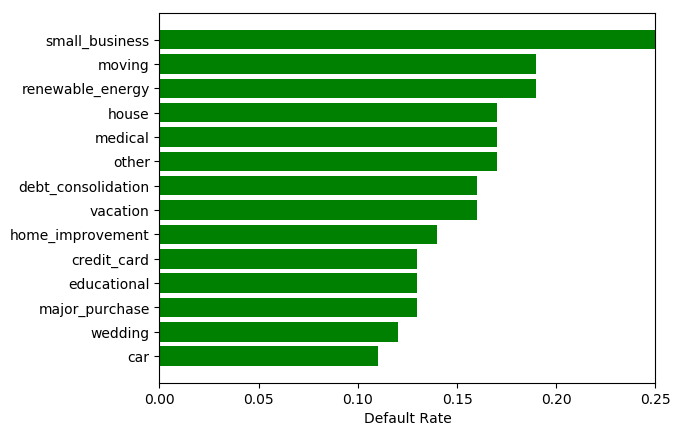

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
#np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = purpose
y_pos = np.arange(len(people))
performance = CO
error = np.random.rand(len(people))

ax.barh(y_pos, performance, color = 'green', )#xerr=error, align='center')
        #color='green',ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Default Rate')
#ax.set_title('Default Rate by Loan Purpose')
ax.set_xlim(0,.25)

plt.show()

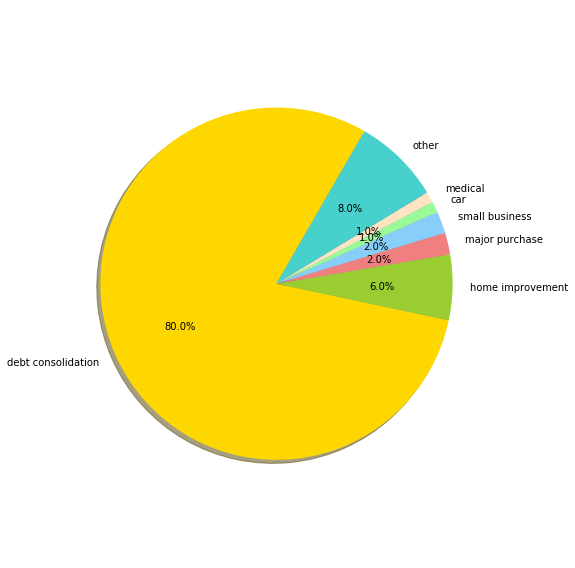

In [34]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = ['debt consolidation','home improvement','major purchase','small business','car','medical','other']
sizes = [80,6,2,2,1,1,8]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','palegreen','bisque','mediumturquoise','cadetblue','magenta','crimson','goldenrod']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=60)

plt.subplots_adjust(top=2, bottom=.1, left=.1, right=1, hspace=1,
                    wspace=.5)

plt.axis('equal')
plt.show()
#create other

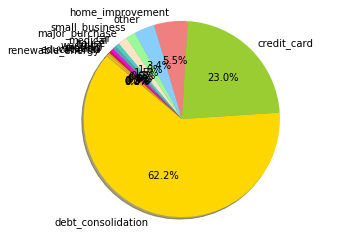

In [5]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = list(d7)
sizes = list(b7)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','palegreen','bisque','mediumturquoise','cadetblue','magenta','crimson','goldenrod']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()
#create other

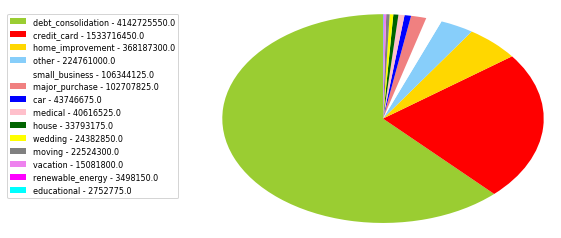

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x = list(d7)
y = list(b7)
colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
#percent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:00}'.format(i,j) for i,j in zip(x, y)]

#sort_legend = True
#if sort_legend:
 #   patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
  #                                        key=lambda x: x[2],
   #                                       reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.show()

In [30]:
a7=df.pivot_table(index='purpose',values='funded_amnt',aggfunc=sum)
a7

,funded_amnt
purpose,
car,4.374668e+07
credit_card,1.533716e+09
debt_consolidation,4.142726e+09
educational,2.752775e+06
home_improvement,3.681873e+08
house,3.379318e+07
major_purchase,1.027078e+08
medical,4.061652e+07
moving,2.252430e+07


In [4]:
a7=df.pivot_table(index='purpose',values='funded_amnt',aggfunc=sum)
a7=a7.sort_values('funded_amnt',ascending=False)
c7=a7.reset_index()
d7=c7['purpose']
b7=c7['funded_amnt']
print(list(d7))
print(list(b7))

['debt_consolidation', 'credit_card', 'home_improvement', 'other', 'small_business', 'major_purchase', 'car', 'medical', 'house', 'wedding', 'moving', 'vacation', 'renewable_energy', 'educational']
[4142725550.0, 1533716450.0, 368187300.0, 224761000.0, 106344125.0, 102707825.0, 43746675.0, 40616525.0, 33793175.0, 24382850.0, 22524300.0, 15081800.0, 3498150.0, 2752775.0]


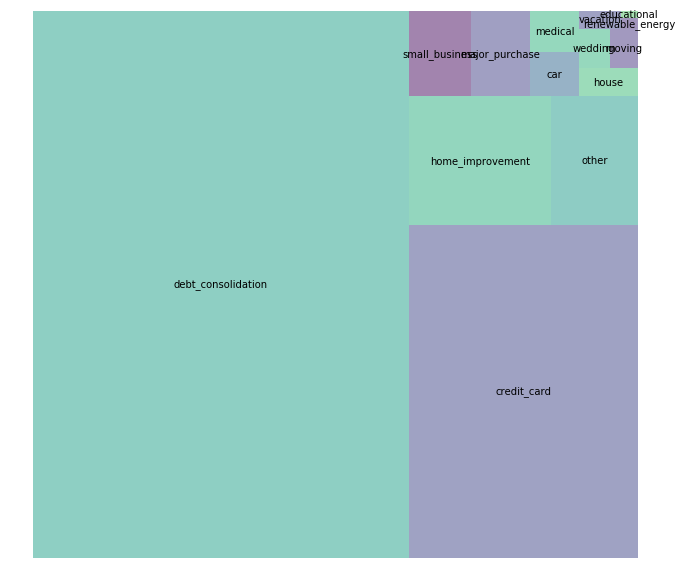

In [6]:
# libraries
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
 
# If you have 2 lists
squarify.plot(sizes=list(b7), label=list(d7), alpha=.5)
plt.subplots_adjust(top=2, bottom=.1, left=.1, right=1.5, hspace=2,
                    wspace=.5)

plt.axis('off')
plt.show()


In [ ]:
#charge off by purpose. #first 180 day charge off by purpose 
#charge off = charge off filter / total
#charge off 180 days = charge off 180 day (or 90 day First Payer Default) filter / total